In [ ]:
# # cloning darknet yolo repo

!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14730, done.
remote: Total 14730 (delta 0), reused 0 (delta 0), pack-reused 14730
Receiving objects: 100% (14730/14730), 13.27 MiB | 15.31 MiB/s, done.
Resolving deltas: 100% (10020/10020), done.


In [ ]:
# I am setting the values in makefile to 1 for GPU and OpenCV usage

%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# Cuda Control

!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# The process of starting the darknet

!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
# Connecting to Google Drive to access folders

%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# I change My\ Drive/ to mydrive for easier

!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:

# I am controlling the contents of I created yolov folder

!ls /mydrive/yolov4-without-pretrained_weights

backup		  generate_train.py  obj.names	test.zip
generate_test.py  obj.data	     obj.zip	yolov4-obj.cfg


In [ ]:
#I copy the obj.zip and test.zip folders to the Cloud and open them under darknet / data with the unzip command.

!cp /mydrive/yolov4-without-pretrained_weights/obj.zip ../
!cp /mydrive/yolov4-without-pretrained_weights/test.zip ../

In [ ]:
!unzip ../obj.zip -d /content/darknet/data
!unzip ../test.zip -d /content/darknet/data

Archive:  ../obj.zip
   creating: /content/darknet/data/obj/
  inflating: /content/darknet/data/obj/images296.jpg  
  inflating: /content/darknet/data/__MACOSX/obj/._images296.jpg  
  inflating: /content/darknet/data/obj/images282.jpg  
  inflating: /content/darknet/data/__MACOSX/obj/._images282.jpg  
  inflating: /content/darknet/data/obj/flare-stack-burning-gases-at-oil-refinery-seria-brunei-A4G960.txt  
  inflating: /content/darknet/data/obj/images26.jpg  
  inflating: /content/darknet/data/__MACOSX/obj/._images26.jpg  
  inflating: /content/darknet/data/obj/images533.jpg  
  inflating: /content/darknet/data/__MACOSX/obj/._images533.jpg  
  inflating: /content/darknet/data/obj/Allegheny National Forest Marcellus Shale Gas Well Flare-0.txt  
  inflating: /content/darknet/data/obj/images527.jpg  
  inflating: /content/darknet/data/__MACOSX/obj/._images527.jpg  
  inflating: /content/darknet/data/obj/images241.jpg  
  inflating: /content/darknet/data/__MACOSX/obj/._images241.jpg  
  in

In [ ]:
# I copy the yolov4-custom.cfg file under the darknet cfg folder to my yolov4 folder on the drive, 
# edit its content and add it again.
!cp /content/darknet/cfg/yolov4-custom.cfg /mydrive/yolov4-without-pretrained_weights/yolov4-obj.cfg


In [ ]:
# I add the edited folder under darknet / cfg

!cp /mydrive/yolov4-without-pretrained_weights/yolov4-obj.cfg /content/darknet/cfg

In [ ]:
# I add the edited folder under darknet/data

!cp /mydrive/yolov4-without-pretrained_weights/obj.names /content/darknet/data
!cp /mydrive/yolov4-without-pretrained_weights/obj.data  /content/darknet/data

In [ ]:
# I add and run the python script that includes the path to train and test files

!cp /mydrive/yolov4-without-pretrained_weights/generate_train.py ./
!cp /mydrive/yolov4-without-pretrained_weights/generate_test.py ./

In [ ]:
!python generate_train.py
!python generate_test.py

In [ ]:
# I use pre-trained Yolov4 weights for higher accuracy rates

# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [ ]:
# I'm checking the data folder

!ls /content/darknet/data

9k.tree     giraffe.jpg		      labels	 openimages.names  train.txt
coco9k.map  goal.txt		      __MACOSX	 person.jpg	   voc.names
coco.names  horses.jpg		      obj	 scream.jpg
dog.jpg     imagenet.labels.list      obj.data	 test
eagle.jpg   imagenet.shortnames.list  obj.names  test.txt


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
# I started the training 


!./darknet/darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov4-obj.cfg -dont_show

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.033257, iou_loss = 0.000000, total_loss = 0.033257 
 total_bbox = 2131656, rewritten_bbox = 0.208148 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.732745), count: 3, class_loss = 2.405588, iou_loss = 8.883904, total_loss = 11.289492 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.750989), count: 8, class_loss = 5.531276, iou_loss = 5.279186, total_loss = 10.810462 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.688407), count: 2, class_loss = 1.466677, iou_loss = 0.357713, total_loss = 1.824390 
 total_bbox = 2131669, rewritten_bbox = 0.208147 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.742135), count: 4, class_loss = 3.998576, iou_loss = 26.278074, total_loss = 30.2766

In [17]:
!./darknet/darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov4-obj.cfg /mydrive/yolov4-without-pretrained_weights/backup/yolov4-obj_last.weights  -dont_show

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.514860), count: 1, class_loss = 0.935973, iou_loss = 1.883223, total_loss = 2.819196 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.666973), count: 9, class_loss = 7.110034, iou_loss = 14.925652, total_loss = 22.035685 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.680340), count: 4, class_loss = 3.507733, iou_loss = 2.442541, total_loss = 5.950274 
 total_bbox = 437203, rewritten_bbox = 0.245424 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.709242), count: 2, class_loss = 1.805176, iou_loss = 14.273407, total_loss = 16.078583 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.627957), count: 5, class_loss = 3.948409, iou_loss = 6.963634, total_loss = 10.912044 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00,

In [18]:
%cd /content/darknet/cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv 

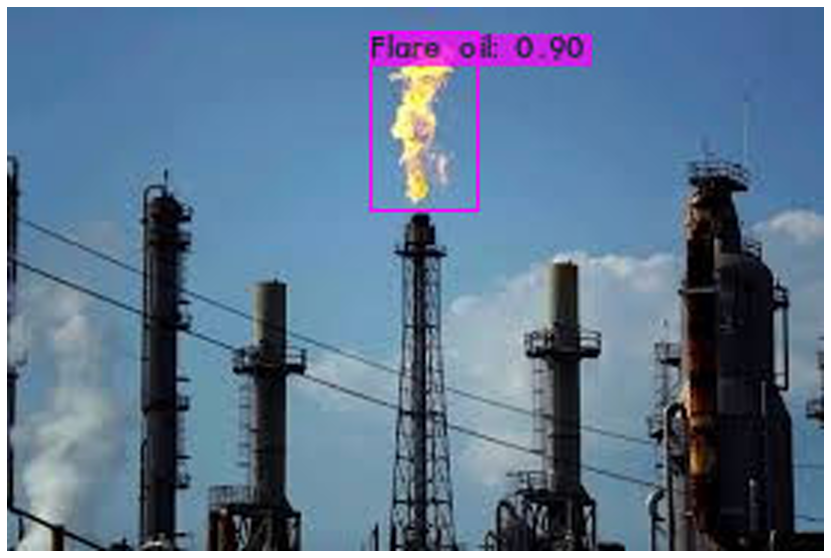

In [23]:
# visual testing process

!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov4-obj.cfg /mydrive/yolov4-without-pretrained_weights/backup/yolov4-obj_last.weights /mydrive/yolov4-without-pretrained_weights/images899.jpg -thresh 0.4
imShow('predictions.jpg')

In [24]:
# to save my predicted images
!cp /content/darknet/predictions.jpg /mydrive/yolov4-without-pretrained_weights/demo

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv 

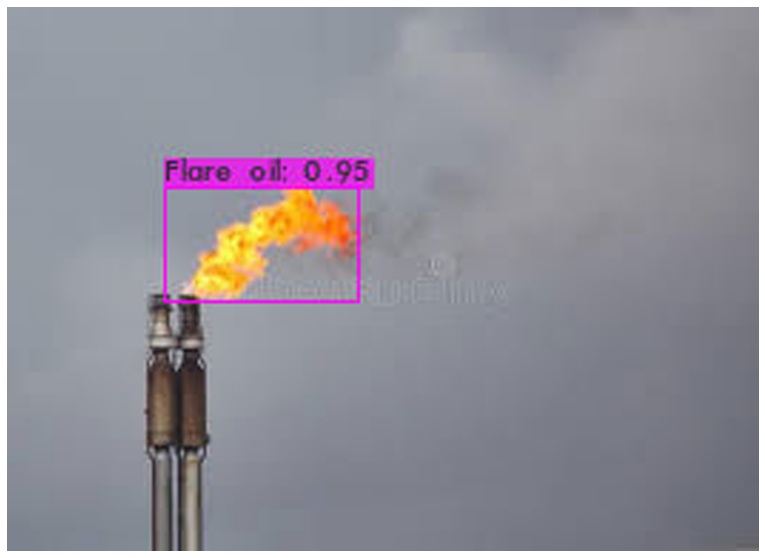

In [25]:
# visual testing process

!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov4-obj.cfg /mydrive/yolov4-without-pretrained_weights/backup/yolov4-obj_last.weights /mydrive/yolov4-without-pretrained_weights/images783.jpg -thresh 0.4
imShow('predictions.jpg')

In [26]:
!cp /content/darknet/predictions.jpg /mydrive/yolov4-without-pretrained_weights/demo/predicted_image2.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv 

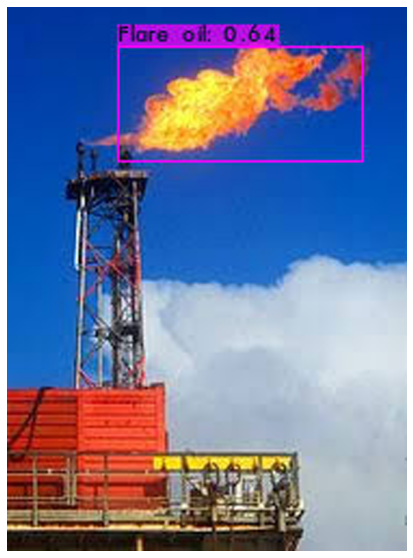

In [28]:
# visual testing process

!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov4-obj.cfg /mydrive/yolov4-without-pretrained_weights/backup/yolov4-obj_last.weights /mydrive/yolov4-without-pretrained_weights/images778.jpg -thresh 0.4
imShow('predictions.jpg')

In [29]:
!cp /content/darknet/predictions.jpg /mydrive/yolov4-without-pretrained_weights/demo/predicted_image3.jpg


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv 

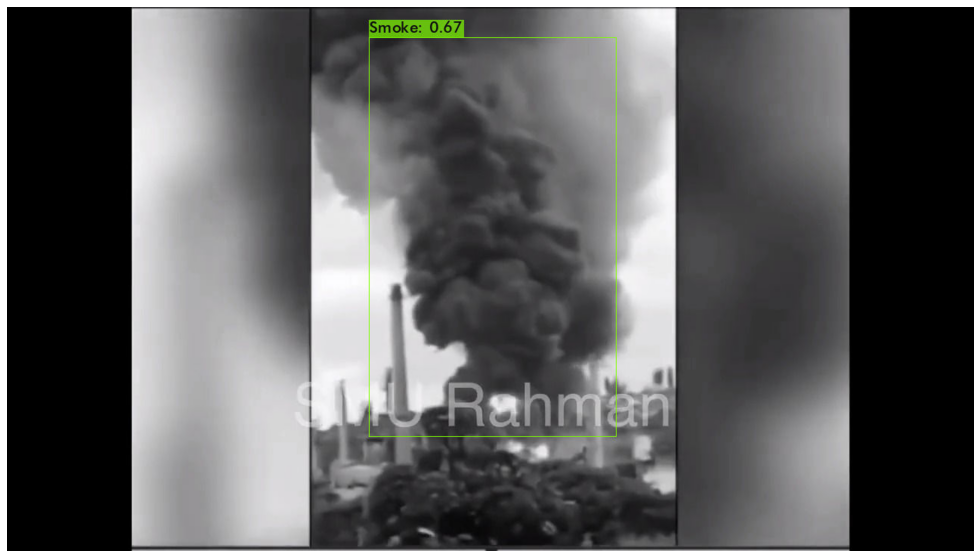

In [30]:
# visual testing process

!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov4-obj.cfg /mydrive/yolov4-without-pretrained_weights/backup/yolov4-obj_last.weights /mydrive/yolov4-without-pretrained_weights/imagesBlackWhite4.jpg -thresh 0.4
imShow('predictions.jpg')

In [31]:
!cp /content/darknet/predictions.jpg /mydrive/yolov4-without-pretrained_weights/demo/predicted_image4.jpg


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv 

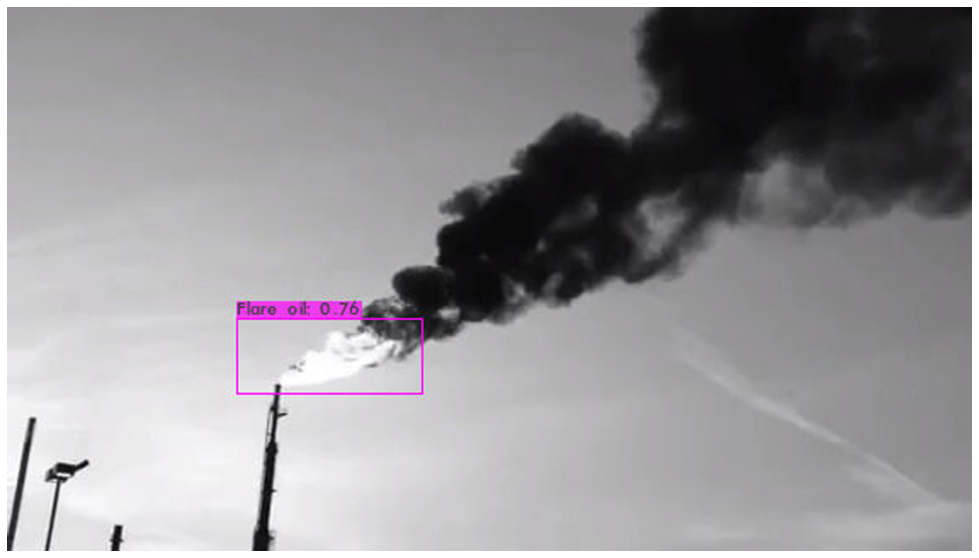

In [33]:
# visual testing process

!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov4-obj.cfg /mydrive/yolov4-without-pretrained_weights/backup/yolov4-obj_last.weights /mydrive/yolov4-without-pretrained_weights/imagesBlackWhite.jpg -thresh 0.4
imShow('predictions.jpg')

In [34]:
!cp /content/darknet/predictions.jpg /mydrive/yolov4-without-pretrained_weights/demo/predicted_image5.jpg
